TUGAS
1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
2) tambahkan faktor-faktor ke objective function (jika perlu)
3) temukan titik optimum sesuai diri masing-masing,
    temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat
   poin 4 paling penting

NAMA : DANI SHOFI NUR IZZA

NPM  : 24083010124

Analisis Numerik  

Optimal jam kuliah   : 4.77
Optimal jam main     : 3.34
Sisa waktu (tugas+fleksibel) : 8.89
Nilai fungsi max     : 7.17487492346061


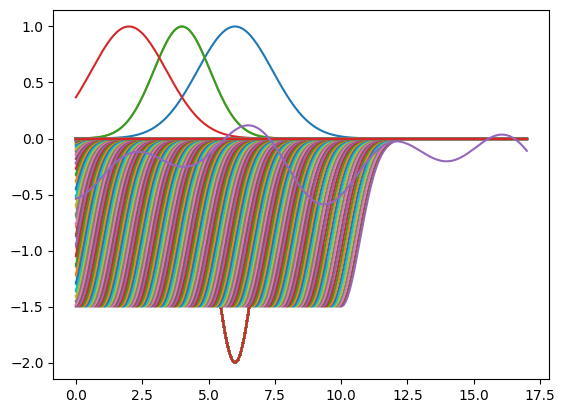

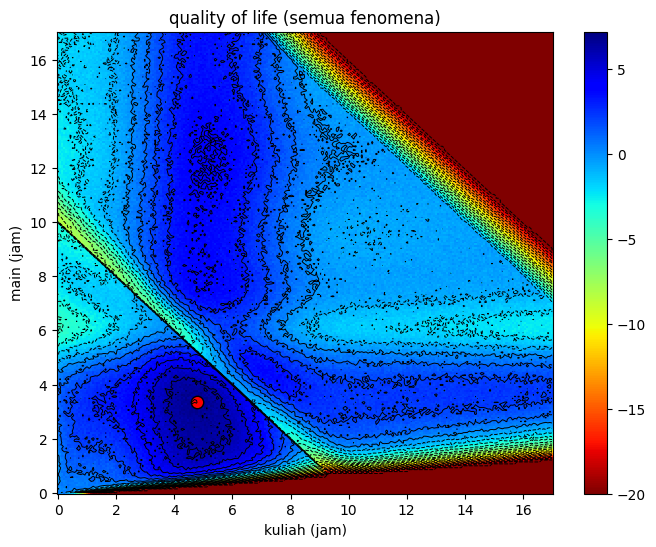

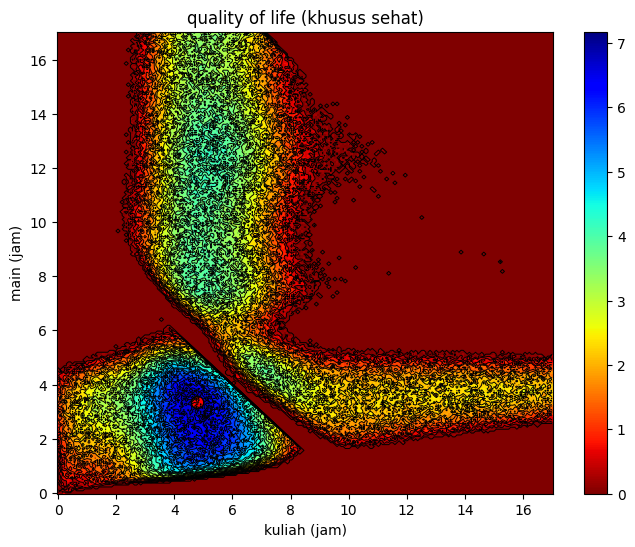

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


istirahat = 7  # tidur ideal 7 jam

# Grid setup
xmin, xmax, ymin, ymax = 0, 24 - istirahat, 0, 24 - istirahat
res = 240
x = np.linspace(xmin, xmax, res)  # variabel kuliah
y = np.linspace(ymin, ymax, res)  # variabel main
X, Y = np.meshgrid(x, y)

# Kuliah (ideal 5–6 jam)
plt.plot(x, np.exp(-((x - 6.0) ** 2) / (2.0 ** 2)))
kuliah_pref = np.exp(-((X - 6.0) ** 2) / (2.0 ** 2))

# Tugas (ideal 3–4 jam)
plt.plot(x, np.exp(-((x - 4.0) ** 2) / (1.5 ** 2)))
tugas_pref = np.exp(-((X - 4.0) ** 2) / (1.5 ** 2))

# Main (ideal 4 jam, range sehat 3–5 jam)
plt.plot(y, np.exp(-((y - 4.0) ** 2) / (1.5 ** 2)))
main_pref = np.exp(-((Y - 4.0) ** 2) / (1.5 ** 2))

# Fleksibel (bonus kalau ada waktu luang malam, ideal ~2 jam)
plt.plot(y, np.exp(-((y - 2.0) ** 2) / (2.0 ** 2)))
fleksibel_pref = np.exp(-((Y - 2.0) ** 2) / (2.0 ** 2))


# Total waktu
total_waktu = X + Y
total_penalty = 0.5 * np.exp(total_waktu / 24.0) ** 2 / 10

# Terlena (kebanyakan main >6 jam)
kebanyakan_main = 2 * np.exp(-((Y - 6.0) ** 2) / (1.0 ** 2))
plt.plot(y, -kebanyakan_main)

# Burnout (tugas berlebihan >6 jam)
tugas = 24.0 - (X + Y + istirahat)
kebanyakan_lembur = 1.5 * np.exp(-((tugas - 7.0) ** 2) / (1.0 ** 2))
plt.plot(x, -kebanyakan_lembur)

# Begadang (kurang tidur <7 jam)
tidur = 24.0 - (X + Y + 7)
penalty_tidur = np.zeros_like(tidur)
mask_tidur = tidur < 7.0
penalty_tidur[mask_tidur] = 5.0 * np.exp(-((tidur[mask_tidur] - 7.0) ** 2) / (1.0 ** 2))

# Ketidakseimbangan kuliah vs main (rasio ideal ~1.5)
ratio = (X + 0.1) / (Y + 0.1)
penalty_imbalanced = np.zeros_like(ratio)
mask_high = ratio > 3.0
penalty_imbalanced[mask_high] = 2.0 * ((ratio[mask_high] - 3.0) ** 2) / 9.0
mask_low = ratio < 0.5
penalty_imbalanced[mask_low] = 2.0 * ((0.5 - ratio[mask_low]) ** 2) / 0.25


NPM = 124
np.random.seed(NPM)

plt.plot(x, 0.4 * np.sin((0.3 * x) - 1) * np.cos(1.0 * y) - 0.2)
ripple = 0.4 * np.sin((0.3 * X) - 1) * np.cos(1.0 * Y) - 0.2
noise = np.random.normal(loc=0.0, scale=0.2, size=X.shape)
ripple += noise

Z = 10.0 * (0.35 * kuliah_pref + 0.25 * tugas_pref + 0.20 * main_pref + 0.20 * fleksibel_pref)
Z = ( Z - kebanyakan_main - kebanyakan_lembur - total_penalty - penalty_tidur - penalty_imbalanced + ripple )
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)


# Semua fenomena
Z_clip = np.clip(Z, -20, 20)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap="jet_r", shading="auto")
contours = plt.contour(X, Y, Z_clip, levels=30, colors="black", linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (semua fenomena)")
plt.scatter(best_x, best_y, color="red", s=80, edgecolor="black", label="Optimal point")

# Khusus sehat
Z_clip = np.clip(Z, 0, 10)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap="jet_r", shading="auto")
contours = plt.contour(X, Y, Z_clip, levels=30, colors="black", linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (khusus sehat)")
plt.scatter(best_x, best_y, color="red", s=80, edgecolor="black", label="Optimal point")

# Cari titik optimal brute force
best_val = -1e9
best_x, best_y = None, None

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        val = Z[i, j]
        if val > best_val:
            best_val = val
            best_x = X[i, j]
            best_y = Y[i, j]

print("Optimal jam kuliah   :", round(best_x, 2))
print("Optimal jam main     :", round(best_y, 2))
print("Sisa waktu (tugas+fleksibel) :", round(24 - best_x - best_y - istirahat, 2))
print("Nilai fungsi max     :", best_val)




Jadwal Harian

05.00 – 05.30 → Bangun & sholat Subuh

05.30 – 06.00 → Tidur lagi / istirahat ringan

06.00 – 07.00 → Persiapan kuliah (mandi, sarapan, berangkat)

07.00 – 12.00 → Kuliah

12.00 – 13.00 → Makan siang & istirahat

13.00 – 14.30 → Kuliah (khusus Kamis), jika tidak ada kuliah → ngerjakan tugas

14.30 – 17.00 → Mengerjakan tugas kuliah

17.00 – 19.00 → Istirahat & bermain (santai, game, media sosial)

19.00 – 23.00 → Belajar hal lain / diskusi / ngerjakan tugas tambahan / bermain jika senggang

23.00 – 05.00 → Tidur malam

Catatan agar lebih sehat

Tidur cukup dan konsisten
Tidurmu sudah sekitar 7 jam, ini ideal. Akan lebih baik jika waktu tidur lebih konsisten (misalnya mulai 22.30) agar ritme biologis stabil.

Kurangi tidur setelah Subuh
Tidur sebentar setelah Subuh boleh saja, tapi bisa diganti dengan olahraga ringan atau membaca agar energi pagi lebih optimal.

Batasi waktu main malam
Bermain sampai larut kadang membuat waktu belajar atau istirahat terganggu. Usahakan waktu bermain di malam hari maksimal 1 jam, sisanya diprioritaskan untuk belajar atau diskusi.

Seimbangkan kuliah, tugas, dan main
Total jam kuliah dan tugas sudah sesuai (sekitar 9–10 jam per hari). Pastikan main tidak lebih dari 3–4 jam agar tidak mengorbankan produktivitas.

Waktu fleksibel malam hari
Manfaatkan jam fleksibel dengan sangat baik. Dapat digunakan untuk belajar hal lain di luar kuliah